In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

file_path = 'Womens Clothing E-Commerce Reviews 2.csv'
df = pd.read_csv(file_path)

df.head()
 

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
# Initial Data Cleaning

df.drop_duplicates(inplace=True)
df = df.dropna(subset=['Review Text'])

# Age Group Binning

bins = [0, 29, 50, np.inf]
labels = ['Under 30', '30-50', '50+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Saving cleaned dataset for further use
cleaned_path = 'Womens_Clothing_Cleaned.csv'
df.to_csv(cleaned_path, index=False)

cleaned_df = pd.read_csv(cleaned_path)

cleaned_df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30-50
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30-50
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,50+
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,30-50
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,30-50


In [9]:
# Exploratory Data Analysis

summary_stats_cleaned = cleaned_df.describe()
rating_distribution_cleaned = cleaned_df['Rating'].value_counts(normalize=True) * 100
recommend_rate_cleaned = cleaned_df.groupby('Age Group')['Recommended IND'].mean() * 100

In [10]:
# Basic Text Preprocessing

def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

cleaned_df['Cleaned Review Text'] = cleaned_df['Review Text'].apply(clean_text)


In [11]:
# Keyword-based sentiment analysis

positive_words = ["love", "great", "excellent", "perfect", "amazing", "wonderful", "comfortable", "nice"]
negative_words = ["bad", "poor", "terrible", "awful", "worst", "hate", "disappointed", "return"]

def simple_sentiment(text):
    text = text.lower()
    pos_count = sum(word in text for word in positive_words)
    neg_count = sum(word in text for word in negative_words)
    return pos_count - neg_count

cleaned_df['Sentiment Score'] = cleaned_df['Cleaned Review Text'].apply(simple_sentiment)

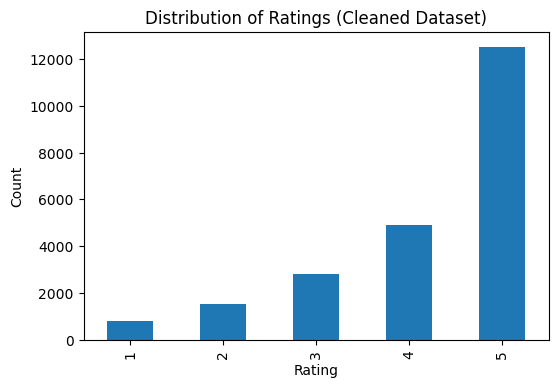

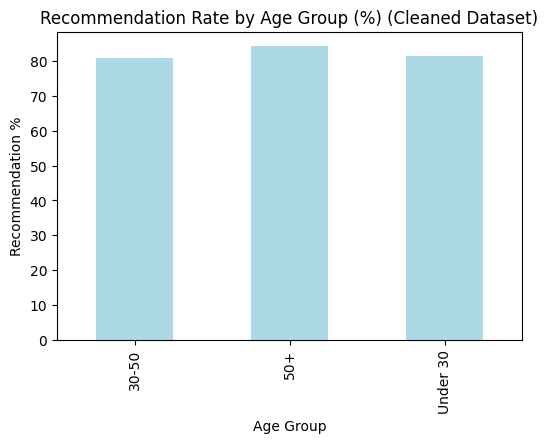

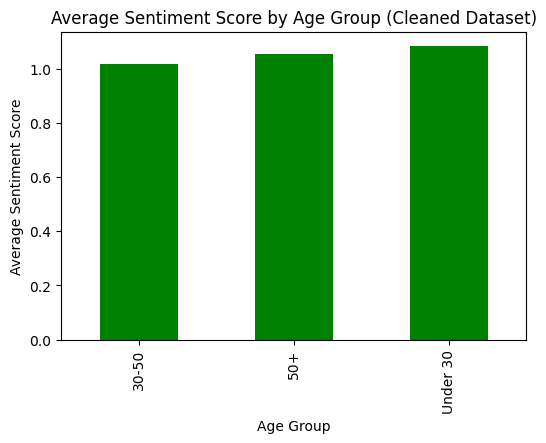

In [12]:
# Visualizations

# Distribution of Ratings
plt.figure(figsize=(6,4))
cleaned_df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings (Cleaned Dataset)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Recommendation Rate by Age Group
plt.figure(figsize=(6,4))
recommend_rate_cleaned.plot(kind='bar', color='lightblue')
plt.title('Recommendation Rate by Age Group (%) (Cleaned Dataset)')
plt.xlabel('Age Group')
plt.ylabel('Recommendation %')
plt.show()

# Average Sentiment by Age Group
avg_sentiment_cleaned = cleaned_df.groupby('Age Group')['Sentiment Score'].mean()

plt.figure(figsize=(6,4))
avg_sentiment_cleaned.plot(kind='bar', color='green')
plt.title('Average Sentiment Score by Age Group (Cleaned Dataset)')
plt.xlabel('Age Group')
plt.ylabel('Average Sentiment Score')
plt.show()